**EXTRACCION DE DATASET**

In [1]:
import os
import pandas as pd

directory_path = 'D:/SISTEMA 39 BARRAS/ESCENARIOS 39BARRAS/'

sheet_name = 'Escenario Load 04'

dataframes = []

for file_name in os.listdir(directory_path):
    if file_name.endswith('.xlsx'):
        file_path = os.path.join(directory_path, file_name)
        
        try:
            df = pd.read_excel(file_path, sheet_name=sheet_name)
            df['Archivo'] = file_name  
            dataframes.append(df)
        except Exception as e:
            print(f"Error cargando {file_name}: {e}")

combined_data2 = pd.concat(dataframes, ignore_index=True)

combined_data2.head(-100)


Error cargando CasoN39G10L45_27.xlsx: Worksheet named 'Escenario Load 04' not found
Error cargando CasoN39L23L76L139_55.xlsx: Worksheet named 'Escenario Load 04' not found
Error cargando CasoN39L318L76L139_24.xlsx: Worksheet named 'Escenario Load 04' not found


,Escala,Bus 01 tension (kV),Bus 01 angulo (° de tension),Bus 02 tension (kV),Bus 02 angulo (° de tension),Bus 03 tension (kV),Bus 03 angulo (° de tension),Bus 04 tension (kV),Bus 04 angulo (° de tension),Bus 05 tension (kV),...,P29-26,Q26-29,Q29-26,P28-29,P29-28,Q28-29,Q29-28,LM,%LM,Archivo
0,500.000000,0.960269,-17.428533,0.950173,-15.902268,0.939793,-15.293121,0.925838,-14.238646,0.935317,...,191.055124,-94.328947,16.218030,-348.236581,349.921117,-53.340379,45.763655,950.000048,0.655172,CasoN39G10L252L1011_1.xlsx
1,550.000012,0.959457,-18.634527,0.947929,-17.186267,0.937021,-16.605198,0.921254,-15.587304,0.931477,...,191.042878,-94.976887,17.051934,-348.241167,349.928013,-54.144514,46.609950,900.000036,0.620690,CasoN39G10L252L1011_1.xlsx
2,600.000024,0.958597,-19.865118,0.945564,-18.495462,0.934103,-17.942757,0.916435,-16.961869,0.927362,...,191.029945,-95.658067,17.929791,-348.245959,349.935259,-54.990790,47.500865,850.000024,0.586207,CasoN39G10L252L1011_1.xlsx
3,649.999976,0.957688,-21.123040,0.943070,-19.832680,0.931029,-19.308665,0.911364,-18.365274,0.922956,...,191.016273,-96.374691,18.854631,-348.250966,349.942879,-55.882090,48.439476,800.000072,0.551724,CasoN39G10L252L1011_1.xlsx
4,699.999988,0.956725,-22.411433,0.940438,-21.201159,0.927787,-20.706207,0.906022,-19.800876,0.918235,...,191.001805,-97.129320,19.829972,-348.256204,349.950900,-56.821759,49.429355,750.000060,0.517241,CasoN39G10L252L1011_1.xlsx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22543,1049.999952,0.978999,-21.147495,1.000376,-19.030042,0.964139,-22.352859,0.913205,-24.037404,0.928513,...,191.495922,-68.879376,-15.736036,-348.035638,349.647536,-22.361917,13.343541,850.000024,0.447368,CasoN39_6.xlsx
22544,1100.000024,0.978617,-22.399405,0.999257,-20.343966,0.961448,-23.698630,0.907570,-25.448145,0.923760,...,191.481255,-69.801061,-14.604247,-348.043610,349.657564,-23.464542,14.491562,799.999952,0.421053,CasoN39_6.xlsx
22545,1149.999976,0.978213,-23.684708,0.998082,-21.692125,0.958623,-25.079587,0.901660,-26.896364,0.918715,...,191.465802,-70.767221,-13.415916,-348.051942,349.668094,-24.621840,15.696962,750.000000,0.394737,CasoN39_6.xlsx
22546,1200.000048,0.977785,-25.007372,0.996845,-23.078580,0.955652,-26.499889,0.895448,-28.386478,0.913349,...,191.449352,-71.781800,-12.165865,-348.060468,349.678977,-25.838749,16.964957,699.999928,0.368421,CasoN39_6.xlsx


In [2]:
combined_data2.iloc[1545][85:]

Q01-39                      -32.762232
Q39-01                      -34.887355
P02-03                        12.98308
P03-02                      -12.818348
Q02-03                       92.027461
                      ...             
Q28-29                           -27.6
Q29-28                        8.077218
LM                          350.000024
%LM                           0.205882
Archivo    CasoN39G10L252L2628_26.xlsx
Name: 1545, Length: 133, dtype: object

In [3]:
combined_data2.iloc[1552]

Escala                                           1700.000048
Bus 01 tension (kV)                                 0.924998
Bus 01 angulo (° de tension)                      -61.050584
Bus 02 tension (kV)                                 0.855687
Bus 02 angulo (° de tension)                      -61.975009
                                            ...             
Q28-29                                                 -27.6
Q29-28                                              8.460215
LM                                                       0.0
%LM                                                      0.0
Archivo                          CasoN39G10L252L2628_26.xlsx
Name: 1552, Length: 218, dtype: object

*Casos generados*

In [4]:
unique_values = combined_data2['Archivo'].unique()
unique_values

array(['CasoN39G10L252L1011_1.xlsx', 'CasoN39G10L252L1011_10.xlsx',
       'CasoN39G10L252L1011_11.xlsx', ..., 'CasoN39_7.xlsx',
       'CasoN39_8.xlsx', 'CasoN39_9.xlsx'], dtype=object)

*Normalizacion*

In [7]:
tension_columns = [col for col in combined_data2.columns if 'tension (kV)' in col]
angulo_columns = [col for col in combined_data2.columns if 'angulo (° de tension)' in col]
potencia_columns = [col for col in combined_data2.columns if 'P' in col or 'Q' in col]

tension_data = combined_data2[tension_columns]
angulo_data = combined_data2[angulo_columns]
potencia_data = combined_data2[potencia_columns]
angulo_min = angulo_data.values.min()
angulo_max = angulo_data.values.max()
angulo_normalizada = (angulo_data - angulo_min) / (angulo_max - angulo_min)
combined_data2[angulo_columns] = angulo_normalizada
tension_min = tension_data.values.min()
tension_max = tension_data.values.max()
tension_normalizada = (tension_data - tension_min) / (tension_max - tension_min)
combined_data2[tension_columns] = tension_normalizada
potencia_min = potencia_data.values.min()
potencia_max = potencia_data.values.max()
potencia_normalizada = (potencia_data - potencia_min) / (potencia_max - potencia_min)
combined_data2[potencia_columns] = potencia_normalizada

In [18]:
combined_data2.describe()

,Escala,Bus 01 tension (kV),Bus 01 angulo (° de tension),Bus 02 tension (kV),Bus 02 angulo (° de tension),Bus 03 tension (kV),Bus 03 angulo (° de tension),Bus 04 tension (kV),Bus 04 angulo (° de tension),Bus 05 tension (kV),...,P26-29,P29-26,Q26-29,Q29-26,P28-29,P29-28,Q28-29,Q29-28,LM,%LM
count,22648.000000,22648.000000,22648.000000,22648.000000,22648.000000,22648.000000,22648.000000,22648.000000,22648.000000,22648.000000,...,22648.000000,22648.000000,22648.000000,22648.000000,22648.000000,22648.000000,22648.000000,22648.000000,22648.000000,22648.000000
mean,1036.018632,0.800375,0.502257,0.799381,0.520352,0.653171,0.454630,0.550253,0.451536,0.604435,...,0.446026,0.551235,0.476736,0.500980,0.409376,0.587595,0.487282,0.507264,536.018637,0.337465
std,344.590266,0.067263,0.128616,0.110063,0.135731,0.115928,0.109933,0.150973,0.112903,0.133779,...,0.017568,0.018253,0.005638,0.007642,0.018140,0.018261,0.005286,0.005967,344.590267,0.206477
min,500.000000,0.591502,0.092556,0.319115,0.113695,0.210364,0.063780,0.000000,0.000000,0.065923,...,0.360502,0.498271,0.460870,0.487730,0.357071,0.498271,0.460328,0.495287,0.000000,0.000000
25%,750.000000,0.758103,0.415148,0.735299,0.427976,0.583197,0.377724,0.452799,0.375287,0.520992,...,0.448466,0.548516,0.473419,0.496542,0.406682,0.590240,0.484068,0.503074,250.000000,0.156250
50%,1000.000000,0.801954,0.509842,0.837259,0.526371,0.671548,0.468447,0.579654,0.468853,0.632132,...,0.448544,0.548565,0.475967,0.499835,0.406702,0.590274,0.487340,0.507053,500.000000,0.333333
75%,1299.999952,0.832644,0.588642,0.888211,0.614022,0.737447,0.542901,0.670009,0.543157,0.708773,...,0.448620,0.548618,0.478977,0.503366,0.406727,0.590303,0.491012,0.510490,800.000012,0.515152
max,2000.000000,0.967577,0.875610,0.934491,0.876222,0.871013,0.665319,0.829287,0.637041,0.846586,...,0.498271,0.640530,0.499023,0.547558,0.498271,0.640535,0.498651,0.542579,1500.000000,0.750000


In [ ]:
tension_data.describe()

In [19]:
(tension_data.describe())[1:].iloc[:,1:5]

,Bus 02 tension (kV),Bus 03 tension (kV),Bus 04 tension (kV),Bus 05 tension (kV)
mean,0.982145,0.914924,0.867607,0.892518
std,0.050602,0.053298,0.069411,0.061505
min,0.761340,0.711341,0.614626,0.644934
25%,0.952683,0.882754,0.822802,0.854154
50%,0.999560,0.923374,0.881125,0.905252
75%,1.022985,0.953671,0.922666,0.940488
max,1.044263,1.015078,0.995895,1.003848


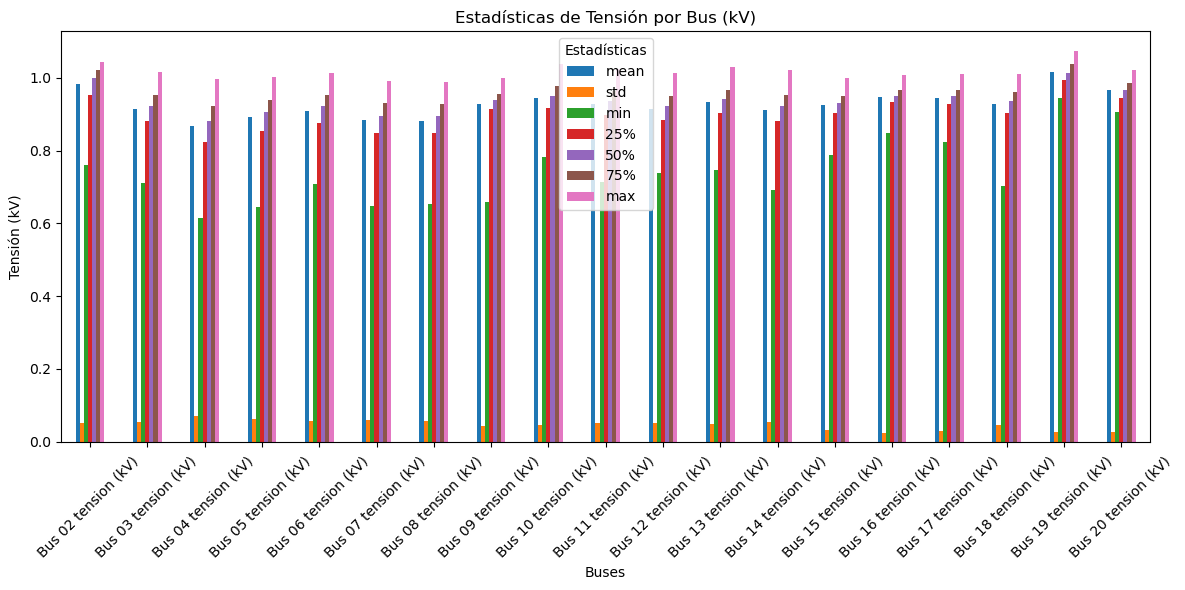

In [20]:
import matplotlib.pyplot as plt
(tension_data.describe())[1:].iloc[:,1:20].T.plot(kind="bar", figsize=(12, 6))
plt.title("Estadísticas de Tensión por Bus (kV)")
plt.ylabel("Tensión (kV)")
plt.xlabel("Buses")
plt.xticks(rotation=45)
plt.legend(title="Estadísticas")
plt.tight_layout()
plt.show()

In [21]:
combined_data2 = combined_data2.set_index(combined_data2.columns[0])
combined_data3=combined_data2.drop(["Archivo"],axis=1)

In [22]:
combined_data3.iloc[1552:,76:]

,Bus 39 tension (kV),Bus 39 angulo (° de tension),P01-02,P02-01,Q01-02,Q02-01,P01-39,P39-01,Q01-39,Q39-01,...,P26-29,P29-26,Q26-29,Q29-26,P28-29,P29-28,Q28-29,Q29-28,LM,%LM
Escala,,,,,,,,,,,,,,,,,,,,,
1700.000048,0.729463,0.200718,0.509857,0.486955,0.530515,0.454620,0.486684,0.509889,0.466026,0.513954,...,0.412371,0.586166,0.466955,0.526122,0.444092,0.552604,0.491012,0.500496,0.000000,0.000000
500.000000,0.729463,0.565764,0.488717,0.507840,0.485185,0.494016,0.507824,0.488741,0.511356,0.467558,...,0.412019,0.586234,0.480323,0.507955,0.444092,0.552600,0.491012,0.500302,1200.000048,0.705882
550.000012,0.729463,0.556853,0.489404,0.507150,0.485997,0.493227,0.507137,0.489426,0.510544,0.468337,...,0.412024,0.586233,0.480083,0.508263,0.444092,0.552600,0.491012,0.500305,1150.000036,0.676471
600.000024,0.729463,0.547796,0.490097,0.506454,0.486843,0.492409,0.506444,0.490117,0.509698,0.469151,...,0.412028,0.586232,0.479834,0.508583,0.444092,0.552600,0.491012,0.500309,1100.000024,0.647059
649.999976,0.729463,0.538582,0.490796,0.505753,0.487725,0.491561,0.505745,0.490814,0.508816,0.470003,...,0.412033,0.586231,0.479575,0.508918,0.444092,0.552600,0.491012,0.500312,1050.000072,0.617647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700.000048,0.729463,0.354160,0.485229,0.511339,0.485236,0.494084,0.511312,0.485256,0.511305,0.467685,...,0.448530,0.548575,0.476542,0.498619,0.406706,0.590268,0.488029,0.506332,199.999928,0.105263
1750.000000,0.729463,0.332834,0.486325,0.510237,0.486311,0.493023,0.510216,0.486349,0.510230,0.468706,...,0.448546,0.548564,0.475921,0.499401,0.406701,0.590275,0.487271,0.507126,149.999976,0.078947
1799.999952,0.729463,0.307861,0.487524,0.509034,0.487598,0.491767,0.509017,0.487545,0.508943,0.469937,...,0.448566,0.548551,0.475186,0.500332,0.406696,0.590283,0.486370,0.508071,100.000024,0.052632


**Generacion de Imagen del Sistema Electrico IEEE 39 Barras Margen de Cargabilidad LM=0**

In [23]:
combined_data2["Archivo"].iloc[1552]

'CasoN39G10L252L2628_26.xlsx'

In [24]:
fila_especifica = combined_data3.iloc[1552]  # Cambia el índice a la fila que desees
fila_especifica[85:]

Q39-01    0.513954
P02-03    0.509586
P03-02    0.487107
Q02-03    0.541921
Q03-02    0.451616
            ...   
P29-28    0.552604
Q28-29    0.491012
Q29-28    0.500496
LM        0.000000
%LM       0.000000
Name: 1700.0000476837158, Length: 131, dtype: float64

In [26]:
import numpy as np

num_barras = 39 
barras=[]
for i in range(1,40):
    barras.append(i)

tensiones = np.array([fila_especifica[f'Bus {i:02d} tension (kV) '] for i in barras])
angulos = np.array([fila_especifica[f'Bus {i:02d} angulo (° de tension) '] for i in barras])


In [30]:
# Extraer potencias activas y reactivas entre barras (llenando los faltantes con 0)
potencia_activa = np.zeros((num_barras, num_barras))
potencia_reactiva = np.zeros((num_barras, num_barras))

for i in range(len(barras)):
    for j in range(i+1, len(barras)):

        barra_i = f"{barras[i]:02d}"
        barra_j = f"{barras[j]:02d}"
        potencia_activa[i, j] = fila_especifica.get(f'P{barra_i}-{barra_j}', 0)
        potencia_activa[j, i] = fila_especifica.get(f'P{barra_j}-{barra_i}', 0)
        potencia_reactiva[i, j] = fila_especifica.get(f'Q{barra_i}-{barra_j}', 0)
        potencia_reactiva[j, i] = fila_especifica.get(f'Q{barra_j}-{barra_i}', 0)




01
02
0.5098574056384753
0.4869546629756
01
03
0.0
0.0
01
04
0.0
0.0
01
05
0.0
0.0
01
06
0.0
0.0
01
07
0.0
0.0
01
08
0.0
0.0
01
09
0.0
0.0
01
10
0.0
0.0
01
11
0.0
0.0
01
12
0.0
0.0
01
13
0.0
0.0
01
14
0.0
0.0
01
15
0.0
0.0
01
16
0.0
0.0
01
17
0.0
0.0
01
18
0.0
0.0
01
19
0.0
0.0
01
20
0.0
0.0
01
21
0.0
0.0
01
22
0.0
0.0
01
23
0.0
0.0
01
24
0.0
0.0
01
25
0.0
0.0
01
26
0.0
0.0
01
27
0.0
0.0
01
28
0.0
0.0
01
29
0.0
0.0
01
30
0.0
0.0
01
31
0.0
0.0
01
32
0.0
0.0
01
33
0.0
0.0
01
34
0.0
0.0
01
35
0.0
0.0
01
36
0.0
0.0
01
37
0.0
0.0
01
38
0.0
0.0
01
39
0.486683612211082
0.5098885547368318
02
03
0.5095863548722344
0.4871069403278448
02
04
0.0
0.0
02
05
0.0
0.0
02
06
0.0
0.0
02
07
0.0
0.0
02
08
0.0
0.0
02
09
0.0
0.0
02
10
0.0
0.0
02
11
0.0
0.0
02
12
0.0
0.0
02
13
0.0
0.0
02
14
0.0
0.0
02
15
0.0
0.0
02
16
0.0
0.0
02
17
0.0
0.0
02
18
0.0
0.0
02
19
0.0
0.0
02
20
0.0
0.0
02
21
0.0
0.0
02
22
0.0
0.0
02
23
0.0
0.0
02
24
0.0
0.0
02
25
0.4982705089259203
0.4982705089259203
02
26
0.0
0.0
02
27
0.0
0.0
02

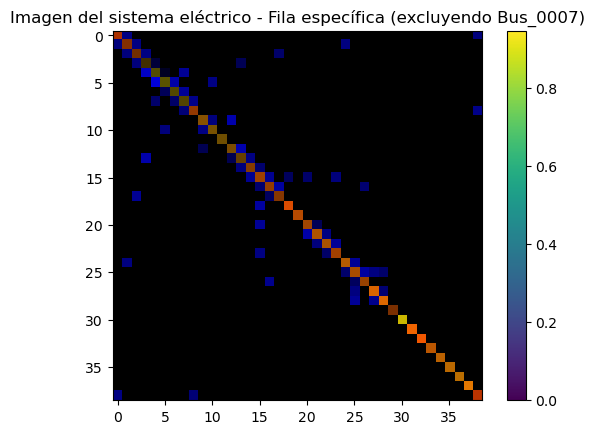

In [39]:
# Crear la imagen basada en tensiones, ángulos y potencias
imagen = np.zeros((num_barras, num_barras, 3))  # Inicializar imagen con ceros

# Asignar tensiones al canal R (Rojo)
for i in range(num_barras):
    imagen[i, i, 0] = tensiones[i]  # Normalizar tensiones

# Asignar ángulos al canal G (Verde)
for i in range(num_barras):
    imagen[i, i, 1] = angulos[i]

# Asignar potencias activas y reactivas al canal B (Azul)
for i in range(num_barras):
    for j in range(num_barras):
        if i != j:
            imagen[i, j, 2] = potencia_activa[i, j]  # Potencia activa normalizada
            #imagen[j, i, 2] = potencia_reactiva[j, i]  # Potencia reactiva normalizada

# Graficar la imagen
plt.imshow(imagen)
plt.title('Imagen del sistema eléctrico - Fila específica (excluyendo Bus_0007)')
plt.colorbar()
plt.show()

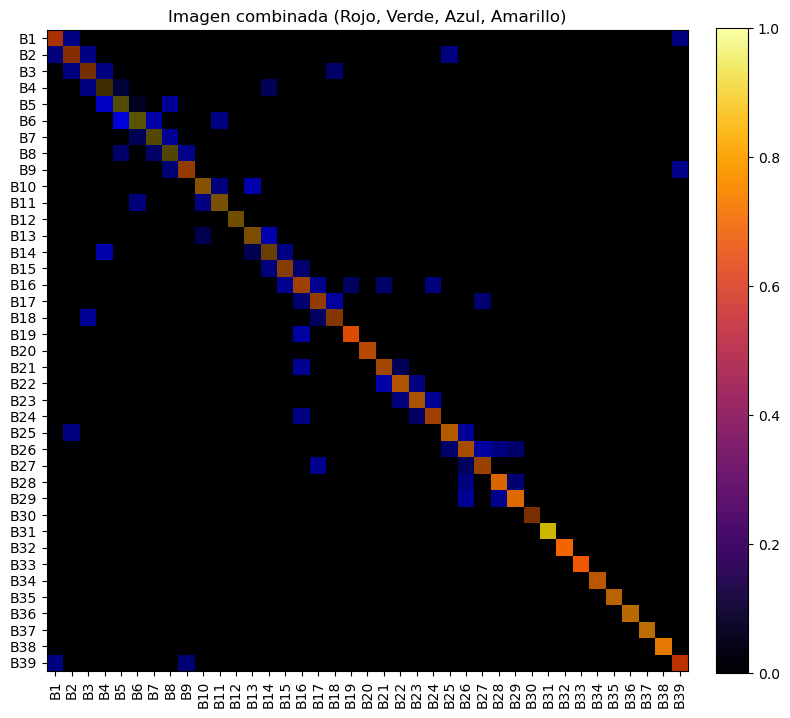

In [74]:

# Crear la imagen de 4 canales
imagen_4_canales = np.zeros((num_barras, num_barras, 4))  # Inicializar con ceros

# Asignar tensiones al canal 1
for i in range(num_barras):
    imagen_4_canales[i, i, 0] = tensiones[i]

# Asignar ángulos al canal 2
for i in range(num_barras):
    imagen_4_canales[i, i, 1] = angulos[i]

# Asignar potencias activas al canal 3
for i in range(num_barras):
    for j in range(num_barras):
        if i != j:
            imagen_4_canales[i, j, 2] = potencia_activa[i, j]

# Asignar potencias reactivas al canal 4
for i in range(num_barras):
    for j in range(num_barras):
        if i != j:
            imagen_4_canales[i, j, 3] = potencia_reactiva[i, j]

# Visualización de la combinación como RGB(A)
fig, ax = plt.subplots(figsize=(8, 8))
imagen_rgb = imagen_4_canales[:, :, :3]
ax.imshow(imagen_rgb)
ax.set_title("Imagen combinada (Rojo, Verde, Azul, Amarillo)")
ax.set_xticks(range(num_barras))
ax.set_yticks(range(num_barras))
ax.set_xticklabels([f"B{i+1}" for i in range(num_barras)], rotation=90)
ax.set_yticklabels([f"B{i+1}" for i in range(num_barras)])
plt.colorbar(plt.cm.ScalarMappable(cmap='inferno'), ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()

*Separado por canales RGB y Canal Adicional*

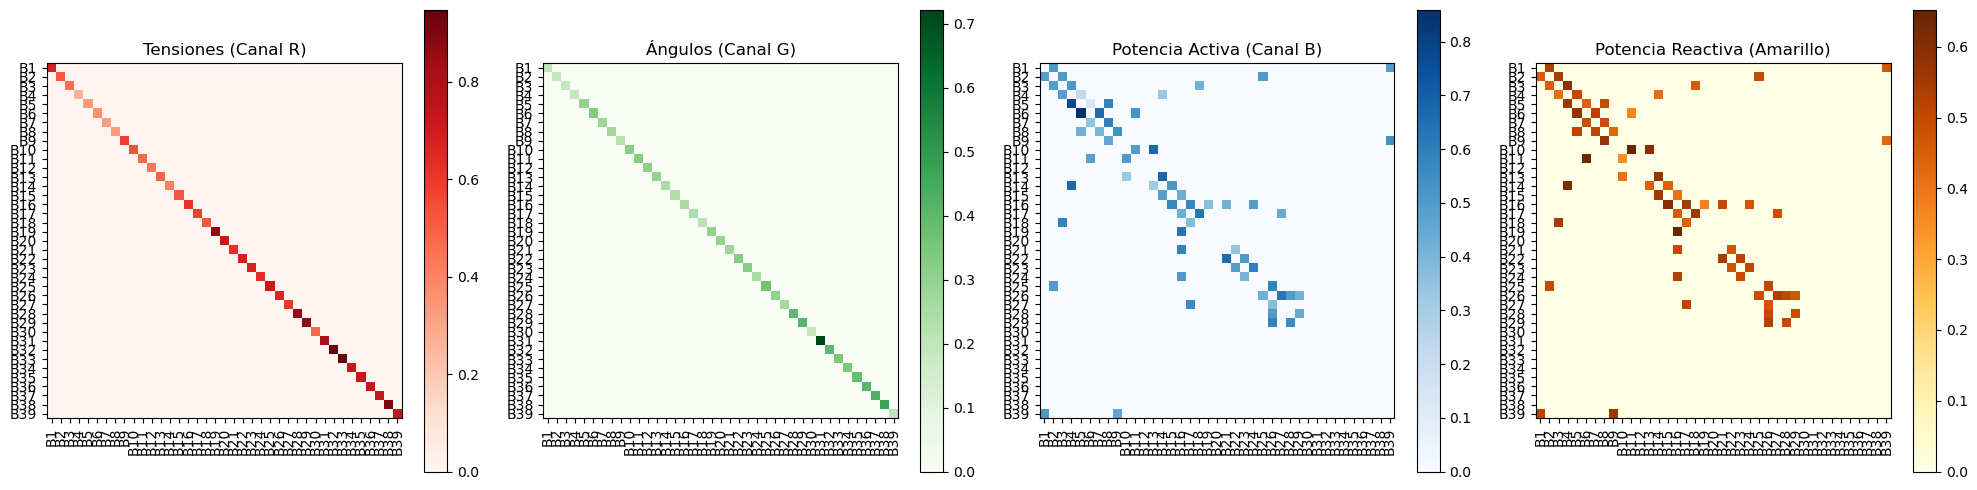

In [76]:
# Separar cada canal
imagen_tensiones = imagen_4_canales[:, :, 0] 
imagen_angulos = imagen_4_canales[:, :, 1]  
imagen_potencia_activa = imagen_4_canales[:, :, 2] 
imagen_potencia_reactiva = imagen_4_canales[:, :, 3]  

# Graficar las cuatro imágenes separadas
plt.figure(figsize=(20, 5))

# Imagen de Tensiones (Rojo)
plt.subplot(1, 4, 1)
plt.imshow(imagen_tensiones, cmap='Reds')
plt.title('Tensiones (Canal R)')
plt.colorbar()
plt.xticks(range(num_barras), [f"B{i+1}" for i in range(num_barras)], rotation=90)
plt.yticks(range(num_barras), [f"B{i+1}" for i in range(num_barras)])

# Imagen de Ángulos (Verde)
plt.subplot(1, 4, 2)
plt.imshow(imagen_angulos, cmap='Greens')
plt.title('Ángulos (Canal G)')
plt.colorbar()
plt.xticks(range(num_barras), [f"B{i+1}" for i in range(num_barras)], rotation=90)
plt.yticks(range(num_barras), [f"B{i+1}" for i in range(num_barras)])

# Imagen de Potencia Activa (Azul)
plt.subplot(1, 4, 3)
plt.imshow(imagen_potencia_activa, cmap='Blues')
plt.title('Potencia Activa (Canal B)')
plt.colorbar()
plt.xticks(range(num_barras), [f"B{i+1}" for i in range(num_barras)], rotation=90)
plt.yticks(range(num_barras), [f"B{i+1}" for i in range(num_barras)])

# Imagen de Potencia Reactiva (Amarillo)
plt.subplot(1, 4, 4)
plt.imshow(imagen_potencia_reactiva, cmap='YlOrBr')  
plt.title('Potencia Reactiva (Amarillo)')
plt.colorbar()
plt.xticks(range(num_barras), [f"B{i+1}" for i in range(num_barras)], rotation=90)
plt.yticks(range(num_barras), [f"B{i+1}" for i in range(num_barras)])

plt.tight_layout()
plt.show()


**Generacion de Imagen del Sistema Electrico IEEE 39 Barras Margen de Cargabilidad LM=1100**

In [77]:
combined_data2["Archivo"].iloc[1560]
combined_data2.iloc[1530]

Bus 01 tension (kV)                                 0.772135
Bus 01 angulo (° de tension)                        0.550979
Bus 02 tension (kV)                                 0.781068
Bus 02 angulo (° de tension)                        0.557488
Bus 03 tension (kV)                                 0.769173
                                            ...             
Q28-29                                              0.491012
Q29-28                                              0.500317
LM                                               1100.000024
%LM                                                 0.647059
Archivo                          CasoN39G10L252L2628_26.xlsx
Name: 600.0000238418579, Length: 217, dtype: object

In [99]:
fila_especifica = combined_data3.iloc[1530]
fila_especifica

Bus 01 tension (kV)                 0.772135
Bus 01 angulo (° de tension)        0.550979
Bus 02 tension (kV)                 0.781068
Bus 02 angulo (° de tension)        0.557488
Bus 03 tension (kV)                 0.769173
                                    ...     
P29-28                              0.552600
Q28-29                              0.491012
Q29-28                              0.500317
LM                               1100.000024
%LM                                 0.647059
Name: 600.0000238418579, Length: 216, dtype: float64

In [100]:
# Extraer tensiones y ángulos de barras de la fila
tensiones2 = np.array([fila_especifica[f'Bus {i:02d} tension (kV) '] for i in barras])
angulos2 = np.array([fila_especifica[f'Bus {i:02d} angulo (° de tension) '] for i in barras])


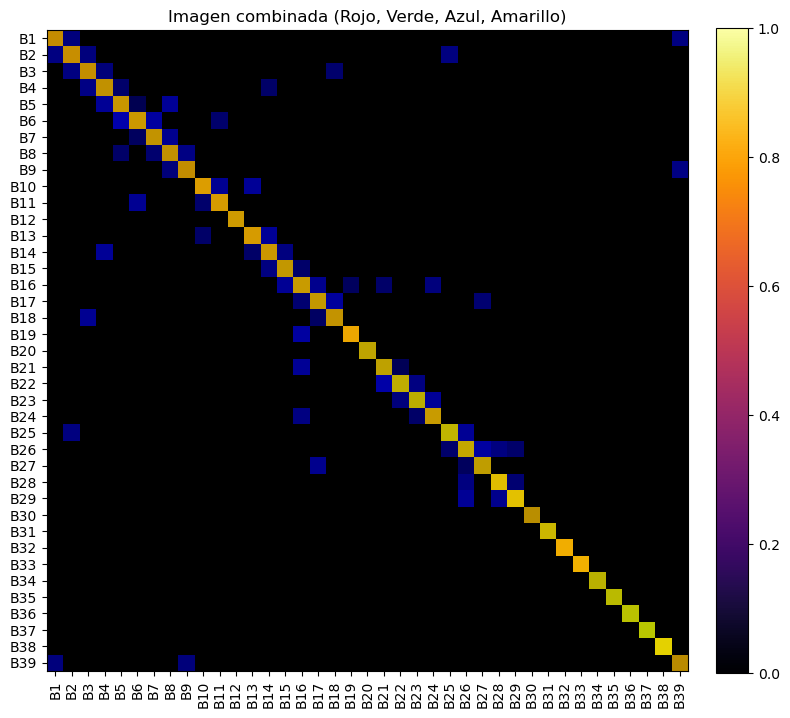

In [104]:
# Extraer potencias activas y reactivas entre barras (llenando los faltantes con 0)
potencia_activa2 = np.zeros((num_barras, num_barras))
potencia_reactiva2 = np.zeros((num_barras, num_barras))

for i in range(len(barras)):
    for j in range(i+1, len(barras)):
#         barra_i = barras[i]
#         barra_j = barras[j]
        barra_i = f"{barras[i]:02d}"
        barra_j = f"{barras[j]:02d}"
        potencia_activa2[i, j] = fila_especifica.get(f'P{barra_i}-{barra_j}', 0)
        potencia_activa2[j, i] = fila_especifica.get(f'P{barra_j}-{barra_i}', 0)
        potencia_reactiva2[i, j] = fila_especifica.get(f'Q{barra_i}-{barra_j}', 0)
        potencia_reactiva2[j, i] = fila_especifica.get(f'Q{barra_j}-{barra_i}', 0)



# Crear la imagen de 4 canales
imagen_4_canales = np.zeros((num_barras, num_barras, 4))  # Inicializar con ceros

# Asignar tensiones al canal 1
for i in range(num_barras):
    imagen_4_canales[i, i, 0] = tensiones2[i]

# Asignar ángulos al canal 2
for i in range(num_barras):
    imagen_4_canales[i, i, 1] = angulos2[i]

# Asignar potencias activas al canal 3
for i in range(num_barras):
    for j in range(num_barras):
        if i != j:
            imagen_4_canales[i, j, 2] = potencia_activa2[i, j]

# Asignar potencias reactivas al canal 4
for i in range(num_barras):
    for j in range(num_barras):
        if i != j:
            imagen_4_canales[i, j, 3] = potencia_reactiva2[i, j]

# Visualización de la combinación como RGB(A)
fig, ax = plt.subplots(figsize=(8, 8))
imagen_rgb = imagen_4_canales[:, :, :3]  # Usar los canales Rojo, Verde, Azul
#imagen_rgb[:, :, 2] += imagen_4_canales[:, :, 3]  # Combinar amarillo en el azul (opcional)
ax.imshow(imagen_rgb)
ax.set_title("Imagen combinada (Rojo, Verde, Azul, Amarillo)")
ax.set_xticks(range(num_barras))
ax.set_yticks(range(num_barras))
ax.set_xticklabels([f"B{i+1}" for i in range(num_barras)], rotation=90)
ax.set_yticklabels([f"B{i+1}" for i in range(num_barras)])
plt.colorbar(plt.cm.ScalarMappable(cmap='inferno'), ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()

*Separado por canales RGB y Canal Adicional*

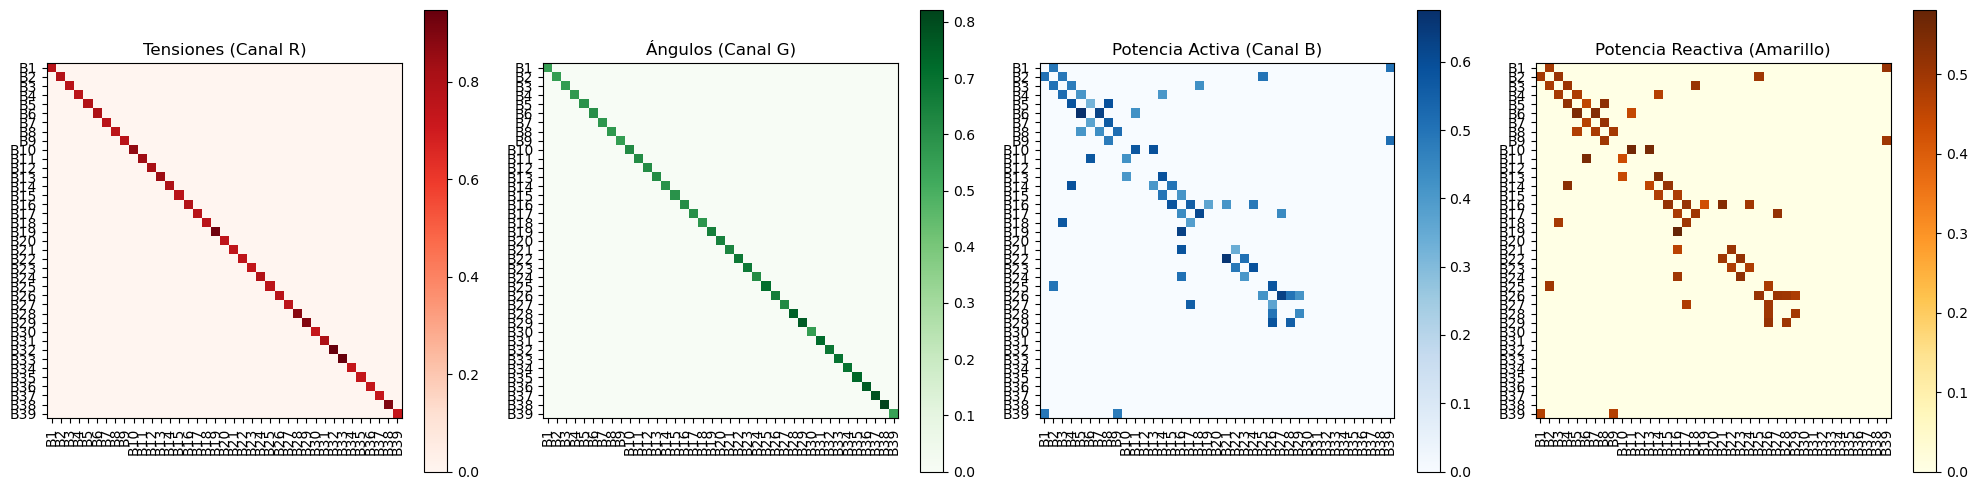

In [105]:
# Separar cada canal
imagen_tensiones = imagen_4_canales[:, :, 0]  # Canal R - Tensiones
imagen_angulos = imagen_4_canales[:, :, 1]  # Canal G - Ángulos
imagen_potencia_activa = imagen_4_canales[:, :, 2]  # Canal B - Potencia Activa
imagen_potencia_reactiva = imagen_4_canales[:, :, 3]  # Canal Amarillo - Potencia Reactiva

# Graficar las cuatro imágenes separadas
plt.figure(figsize=(20, 5))

# Imagen de Tensiones (Rojo)
plt.subplot(1, 4, 1)
plt.imshow(imagen_tensiones, cmap='Reds')
plt.title('Tensiones (Canal R)')
plt.colorbar()
plt.xticks(range(num_barras), [f"B{i+1}" for i in range(num_barras)], rotation=90)
plt.yticks(range(num_barras), [f"B{i+1}" for i in range(num_barras)])

# Imagen de Ángulos (Verde)
plt.subplot(1, 4, 2)
plt.imshow(imagen_angulos, cmap='Greens')
plt.title('Ángulos (Canal G)')
plt.colorbar()
plt.xticks(range(num_barras), [f"B{i+1}" for i in range(num_barras)], rotation=90)
plt.yticks(range(num_barras), [f"B{i+1}" for i in range(num_barras)])

# Imagen de Potencia Activa (Azul)
plt.subplot(1, 4, 3)
plt.imshow(imagen_potencia_activa, cmap='Blues')
plt.title('Potencia Activa (Canal B)')
plt.colorbar()
plt.xticks(range(num_barras), [f"B{i+1}" for i in range(num_barras)], rotation=90)
plt.yticks(range(num_barras), [f"B{i+1}" for i in range(num_barras)])

# Imagen de Potencia Reactiva (Amarillo)
plt.subplot(1, 4, 4)
plt.imshow(imagen_potencia_reactiva, cmap='YlOrBr')  # Paleta de amarillo
plt.title('Potencia Reactiva (Amarillo)')
plt.colorbar()
plt.xticks(range(num_barras), [f"B{i+1}" for i in range(num_barras)], rotation=90)
plt.yticks(range(num_barras), [f"B{i+1}" for i in range(num_barras)])

plt.tight_layout()
plt.show()


In [106]:
combined_data3

,Bus 01 tension (kV),Bus 01 angulo (° de tension),Bus 02 tension (kV),Bus 02 angulo (° de tension),Bus 03 tension (kV),Bus 03 angulo (° de tension),Bus 04 tension (kV),Bus 04 angulo (° de tension),Bus 05 tension (kV),Bus 05 angulo (° de tension),...,P26-29,P29-26,Q26-29,Q29-26,P28-29,P29-28,Q28-29,Q29-28,LM,%LM
Escala,,,,,,,,,,,,,,,,,,,,,
500.000000,0.751798,0.570979,0.729840,0.584133,0.707263,0.589383,0.676909,0.598470,0.697526,0.603168,...,0.448616,0.548519,0.473462,0.502536,0.406683,0.590301,0.484242,0.510307,950.000048,0.655172
550.000012,0.750032,0.560586,0.724958,0.573067,0.701233,0.578075,0.666939,0.586847,0.689173,0.594628,...,0.448621,0.548516,0.473291,0.502755,0.406682,0.590303,0.484030,0.510529,900.000036,0.620690
600.000024,0.748163,0.549980,0.719814,0.561784,0.694886,0.566548,0.656457,0.575001,0.680225,0.585927,...,0.448626,0.548512,0.473112,0.502986,0.406680,0.590305,0.483808,0.510763,850.000024,0.586207
649.999976,0.746185,0.539139,0.714390,0.550260,0.688199,0.554776,0.645427,0.562906,0.670640,0.577048,...,0.448632,0.548509,0.472924,0.503229,0.406679,0.590307,0.483573,0.511010,800.000072,0.551724
699.999988,0.744090,0.528036,0.708666,0.538466,0.681148,0.542732,0.633808,0.550534,0.660372,0.567969,...,0.448638,0.548505,0.472725,0.503486,0.406678,0.590309,0.483326,0.511271,750.000060,0.517241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700.000048,0.777954,0.360333,0.797498,0.370582,0.659299,0.337505,0.426698,0.313358,0.477351,0.401078,...,0.448530,0.548575,0.476542,0.498619,0.406706,0.590268,0.488029,0.506332,199.999928,0.105263
1750.000000,0.775609,0.338478,0.791084,0.347952,0.643975,0.314323,0.394827,0.288888,0.446182,0.382934,...,0.448546,0.548564,0.475921,0.499401,0.406701,0.590275,0.487271,0.507126,149.999976,0.078947
1799.999952,0.772799,0.312929,0.783441,0.321559,0.625727,0.287291,0.356905,0.260328,0.408562,0.361818,...,0.448566,0.548551,0.475186,0.500332,0.406696,0.590283,0.486370,0.508071,100.000024,0.052632


JUNTAMOS TODO

In [107]:
import numpy as np

# Lista para almacenar todas las imágenes de los escenarios
imagenes_escenarios = []

# Número de barras y configuración de exclusión
num_barras = 39
barras=[]
for i in range(1,40):
    barras.append(i)
    
# Generar imágenes para cada fila en combined_data3
for i in range(len(combined_data3)):
    fila_especifica = combined_data3.iloc[i]
    
    # Extraer tensiones y ángulos
    tensiones = np.array([fila_especifica[f'Bus {j:02d} tension (kV) '] for j in barras])
    angulos = np.array([fila_especifica[f'Bus {j:02d} angulo (° de tension) '] for j in barras])
    
    # Extraer potencias activas y reactivas
    potencia_activa = np.zeros((num_barras, num_barras))
    potencia_reactiva = np.zeros((num_barras, num_barras))
    
    for x in range(len(barras)):
        for y in range(x+1, len(barras)):
            barra_x = f"{barras[x]:02d}"
            barra_y = f"{barras[y]:02d}"
            potencia_activa[x, y] = fila_especifica.get(f'P{barra_x}-{barra_y}', 0)
            potencia_activa[y, x] = fila_especifica.get(f'P{barra_y}-{barra_x}', 0)
            potencia_reactiva[x, y] = fila_especifica.get(f'Q{barra_x}-{barra_y}', 0)
            potencia_reactiva[y, x] = fila_especifica.get(f'Q{barra_y}-{barra_x}', 0)
    

    imagen = np.zeros((num_barras, num_barras, 4))
    
    # Canal R - Tensiones
    for k in range(num_barras):
        imagen[k, k, 0] = tensiones[k]
        
    # Canal G - Ángulos
    for k in range(num_barras):
        imagen[k, k, 1] = angulos[k]
        
    # Canal B - Potencias Activas
    for x in range(num_barras):
        for y in range(num_barras):
            if x != y:
                imagen[x, y, 2] = potencia_activa[x, y]
    
    # Canal A - Potencias Reactivas
    for x in range(num_barras):
        for y in range(num_barras):
            if x != y:
                imagen[x, y, 3] = potencia_reactiva[x, y]
    
    # Añadir la imagen a la lista de escenarios
    imagenes_escenarios.append(imagen)


In [108]:
imagenes_escenarios = np.array(imagenes_escenarios)
imagenes_escenarios.shape

(22648, 39, 39, 4)

**Modelo CNN Arquitectura**

In [122]:
import tensorflow as tf
from tensorflow.keras import layers, regularizers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Definir el modelo secuencial
model = models.Sequential()

# Ajustar las capas convolucionales para el tamaño de entrada (13, 13, 3)
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(39, 39, 4), kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.MaxPooling2D((2, 2), padding='same'))

model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.MaxPooling2D((2, 2), padding='same'))

# Reducimos el tamaño del filtro a (2, 2) en la última capa de convolución para evitar dimensiones negativas
model.add(layers.Conv2D(128, (2, 2), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.MaxPooling2D((2, 2), padding='same'))

# Aplanar la salida para conectarla a las capas densas
model.add(layers.Flatten())

# Capas densas para regresión
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))

# Capa de salida con 1 neurona para predecir el margen de cargabilidad
model.add(layers.Dense(1))

# Compilar el modelo para regresión
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Callbacks para el entrenamiento
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

# Resumen de la arquitectura del modelo
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 37, 37, 32)        1184      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 19, 19, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 17, 17, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 9, 9, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 8, 8, 128)         32896     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 4, 4, 128)        

**Entrenamiento modelo CNN**

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
valores_objetivo = np.array(combined_data3["LM"].values)  # Debe tener forma (n_samples,)


Epoch 1/150
484/484 [==============================] - 20s 39ms/step - loss: 66024.1484 - mae: 192.1038 - val_loss: 14146.4072 - val_mae: 90.5619 - lr: 0.0010
Epoch 2/150
484/484 [==============================] - 19s 39ms/step - loss: 8689.3770 - mae: 70.0421 - val_loss: 9583.6670 - val_mae: 75.0559 - lr: 0.0010
Epoch 3/150
484/484 [==============================] - 19s 38ms/step - loss: 3948.3452 - mae: 46.7301 - val_loss: 5977.8477 - val_mae: 62.2555 - lr: 0.0010
Epoch 4/150
484/484 [==============================] - 20s 42ms/step - loss: 2373.5837 - mae: 35.6991 - val_loss: 1739.9027 - val_mae: 29.2928 - lr: 0.0010
Epoch 5/150
484/484 [==============================] - 25s 52ms/step - loss: 1744.0983 - mae: 30.5032 - val_loss: 1248.3989 - val_mae: 25.3840 - lr: 0.0010
Epoch 6/150
484/484 [==============================] - 25s 52ms/step - loss: 1672.5325 - mae: 30.0633 - val_loss: 1098.5969 - val_mae: 24.3014 - lr: 0.0010
Epoch 7/150
484/484 [==============================] - 23s 48

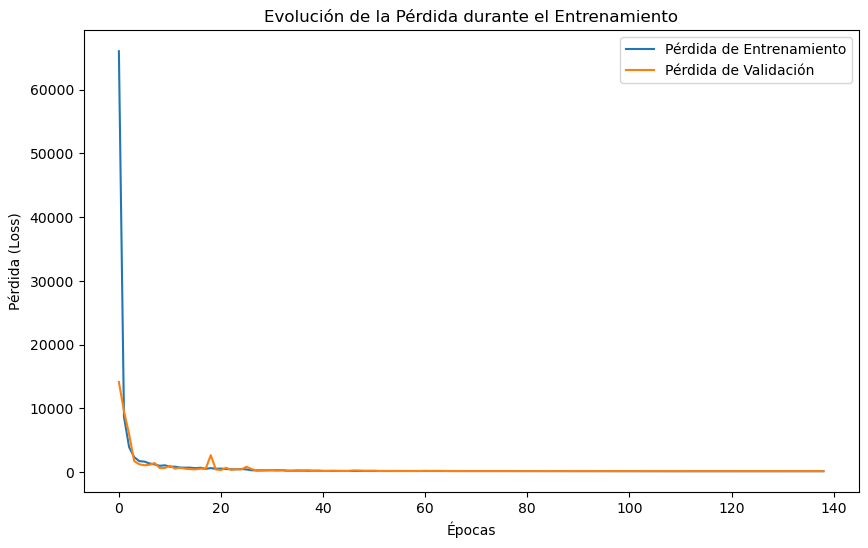

In [124]:
X_train, X_test, y_train, y_test = train_test_split(imagenes_escenarios, valores_objetivo, test_size=0.2, random_state=42)

# Entrenar el modelo
historial = model.fit(X_train, y_train, epochs=150, batch_size=30, validation_split=0.2,  callbacks=[early_stop, lr_scheduler])
# Graficar el loss de entrenamiento y validación
plt.figure(figsize=(10, 6))
plt.plot(historial.history['loss'], label='Pérdida de Entrenamiento')
if 'val_loss' in historial.history:
    plt.plot(historial.history['val_loss'], label='Pérdida de Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida (Loss)')
plt.title('Evolución de la Pérdida durante el Entrenamiento')
plt.legend()
plt.show()

In [125]:
predicciones_test = model.predict(X_test).flatten()

142/142 [==============================] - 2s 10ms/step


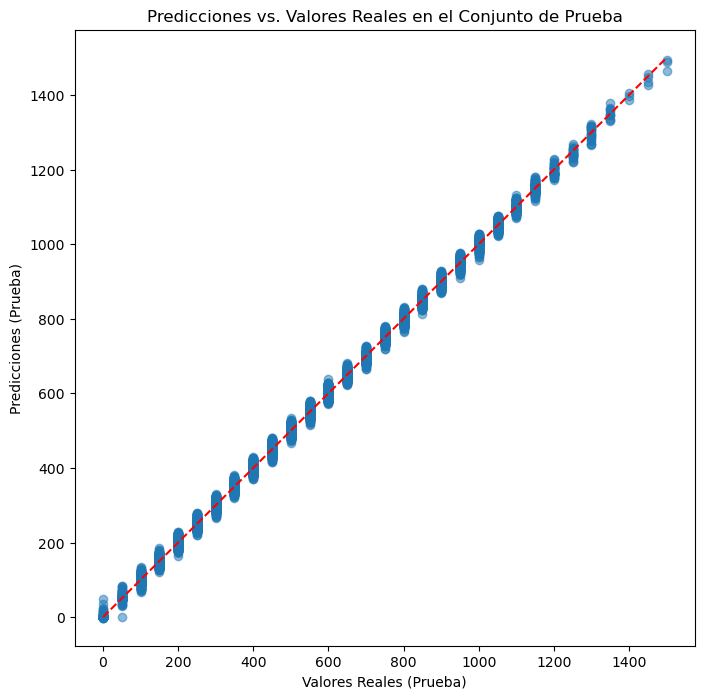

In [126]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.scatter(y_test, predicciones_test, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Línea de referencia
plt.xlabel('Valores Reales (Prueba)')
plt.ylabel('Predicciones (Prueba)')
plt.title('Predicciones vs. Valores Reales en el Conjunto de Prueba')
plt.show()


**Modelos DT,RF, SVM y ANN**

In [127]:
#combined_data2 = combined_data2.set_index(combined_data2.columns[0])

combined_data3=combined_data2.drop(["Archivo"],axis=1)

In [129]:
combined_data4=combined_data3.drop(["%LM"],axis=1)
combined_data4

,Bus 01 tension (kV),Bus 01 angulo (° de tension),Bus 02 tension (kV),Bus 02 angulo (° de tension),Bus 03 tension (kV),Bus 03 angulo (° de tension),Bus 04 tension (kV),Bus 04 angulo (° de tension),Bus 05 tension (kV),Bus 05 angulo (° de tension),...,Q28-26,P26-29,P29-26,Q26-29,Q29-26,P28-29,P29-28,Q28-29,Q29-28,LM
Escala,,,,,,,,,,,,,,,,,,,,,
500.000000,0.751798,0.570979,0.729840,0.584133,0.707263,0.589383,0.676909,0.598470,0.697526,0.603168,...,0.505040,0.448616,0.548519,0.473462,0.502536,0.406683,0.590301,0.484242,0.510307,950.000048
550.000012,0.750032,0.560586,0.724958,0.573067,0.701233,0.578075,0.666939,0.586847,0.689173,0.594628,...,0.505252,0.448621,0.548516,0.473291,0.502755,0.406682,0.590303,0.484030,0.510529,900.000036
600.000024,0.748163,0.549980,0.719814,0.561784,0.694886,0.566548,0.656457,0.575001,0.680225,0.585927,...,0.505474,0.448626,0.548512,0.473112,0.502986,0.406680,0.590305,0.483808,0.510763,850.000024
649.999976,0.746185,0.539139,0.714390,0.550260,0.688199,0.554776,0.645427,0.562906,0.670640,0.577048,...,0.505709,0.448632,0.548509,0.472924,0.503229,0.406679,0.590307,0.483573,0.511010,800.000072
699.999988,0.744090,0.528036,0.708666,0.538466,0.681148,0.542732,0.633808,0.550534,0.660372,0.567969,...,0.505956,0.448638,0.548505,0.472725,0.503486,0.406678,0.590309,0.483326,0.511271,750.000060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700.000048,0.777954,0.360333,0.797498,0.370582,0.659299,0.337505,0.426698,0.313358,0.477351,0.401078,...,0.501253,0.448530,0.548575,0.476542,0.498619,0.406706,0.590268,0.488029,0.506332,199.999928
1750.000000,0.775609,0.338478,0.791084,0.347952,0.643975,0.314323,0.394827,0.288888,0.446182,0.382934,...,0.502011,0.448546,0.548564,0.475921,0.499401,0.406701,0.590275,0.487271,0.507126,149.999976
1799.999952,0.772799,0.312929,0.783441,0.321559,0.625727,0.287291,0.356905,0.260328,0.408562,0.361818,...,0.502912,0.448566,0.548551,0.475186,0.500332,0.406696,0.590283,0.486370,0.508071,100.000024


In [130]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf

# Extraer características y valores de regresión
X = combined_data4.drop(columns=["LM"])  # Características de entrada
y = combined_data4["LM"]                 # Valores de salida (regresión)

X=X.values
y=y.values

In [131]:
X.shape

(22648, 214)

In [132]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Entrenamiento y metricas de modelos SVM, DT,RF y ANN

In [133]:

results = {}

# 1. Modelo de Árbol de Decisión
tree_model = DecisionTreeRegressor(max_depth=5000, random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
results['Decision Tree'] = {
    'MSE': mean_squared_error(y_test, y_pred_tree),
    'MAE': mean_absolute_error(y_test, y_pred_tree)
}

In [134]:
# 2. Modelo de Máquina de Vectores de Soporte (SVM)
svm_model = SVR(kernel='rbf', C=5.0, epsilon=0.01)
svm_model.fit(X_train, y_train)
y_pred_svr = svm_model.predict(X_test)
results['SVM'] = {
    'MSE': mean_squared_error(y_test, y_pred_svr),
    'MAE': mean_absolute_error(y_test, y_pred_svr)
}

In [135]:

nn_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)  # Capa de salida para regresión
])
nn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

nn_model.fit(X_train, y_train, epochs=200, batch_size=16, validation_split=0.2, verbose=0)
y_pred_nn = nn_model.predict(X_test).flatten()
results['Neural Network'] = {
    'MSE': mean_squared_error(y_test, y_pred_nn),
    'MAE': mean_absolute_error(y_test, y_pred_nn)
}

142/142 [==============================] - 0s 889us/step


In [136]:
# 4. Modelo de Bosque Aleatorio
rf_model = RandomForestRegressor(n_estimators=1000, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
results['Random Forest'] = {
    'MSE': mean_squared_error(y_test, y_pred_rf),
    'MAE': mean_absolute_error(y_test, y_pred_rf)
}


for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    print(f"  Mean Squared Error (MSE): {metrics['MSE']}")
    print(f"  Mean Absolute Error (MAE): {metrics['MAE']}")



Decision Tree:
  Mean Squared Error (MSE): 456.95375131835226
  Mean Absolute Error (MAE): 8.167774857394217

SVM:
  Mean Squared Error (MSE): 2670.041884188503
  Mean Absolute Error (MAE): 35.364921066951574

Neural Network:
  Mean Squared Error (MSE): 343.3581018168618
  Mean Absolute Error (MAE): 14.647771562106298

Random Forest:
  Mean Squared Error (MSE): 170.92027563641787
  Mean Absolute Error (MAE): 8.610089413558375


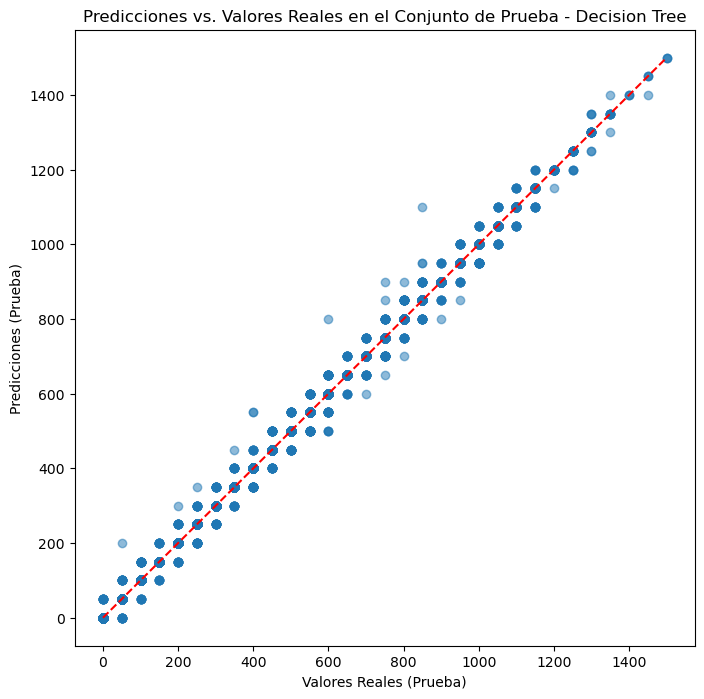

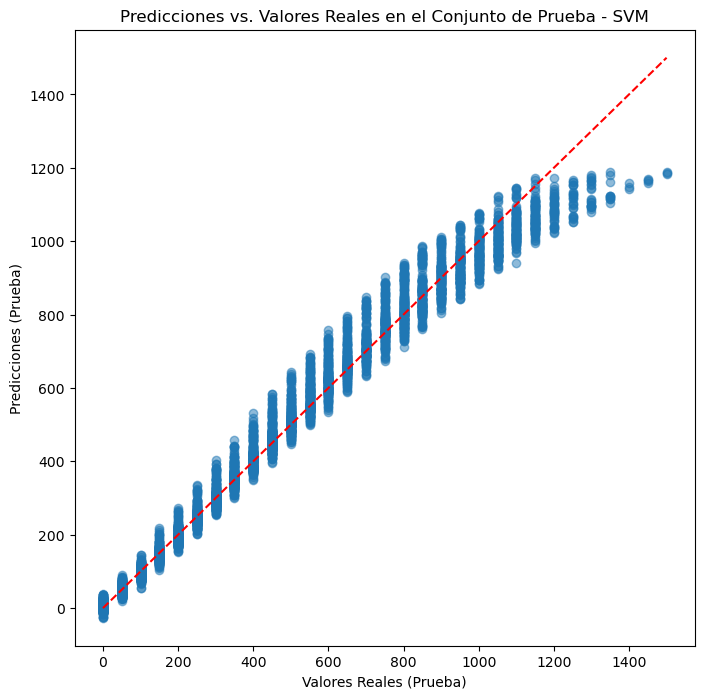

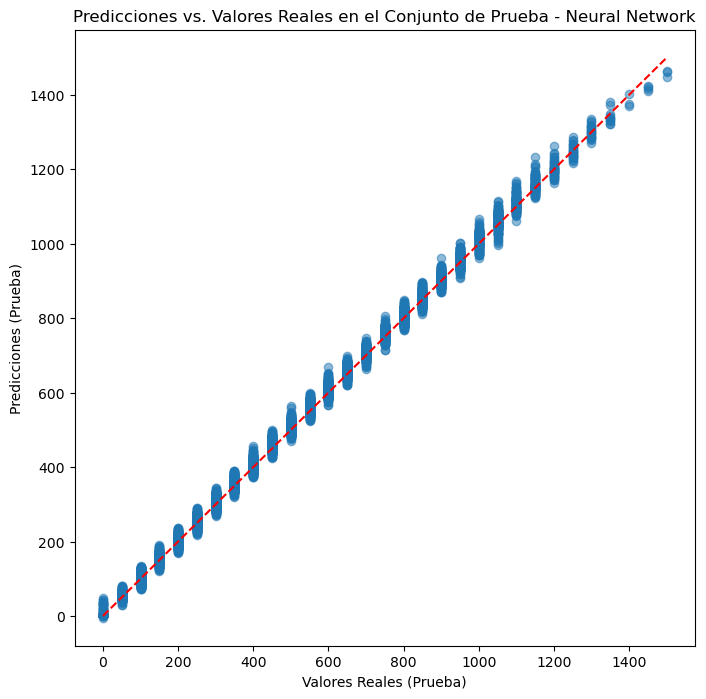

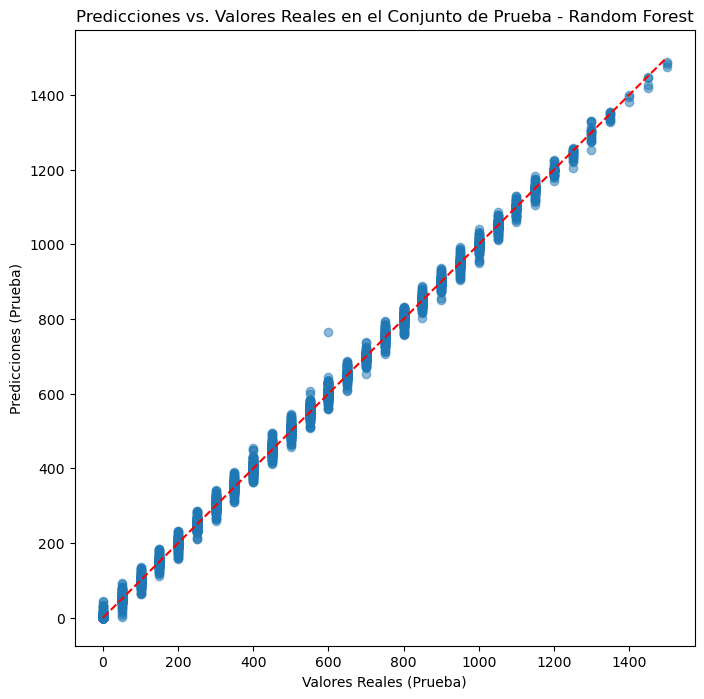

In [137]:
import matplotlib.pyplot as plt


def plot_predictions(y_test, predictions, model_name):
    plt.figure(figsize=(8, 8))
    plt.scatter(y_test, predictions, alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--') 
    plt.xlabel('Valores Reales (Prueba)')
    plt.ylabel('Predicciones (Prueba)')
    plt.title(f'Predicciones vs. Valores Reales en el Conjunto de Prueba - {model_name}')
    plt.show()


plot_predictions(y_test, y_pred_tree, "Decision Tree")

plot_predictions(y_test, y_pred_svr, "SVM")

plot_predictions(y_test, y_pred_nn, "Neural Network")

plot_predictions(y_test, y_pred_rf, "Random Forest")
